[(12, 360), (10, 359), (8, 355), (9, 352), (11, 346), (14, 337), (13, 331), (7, 325), (15, 307), (16, 301), (19, 280), (6, 271), (18, 271), (17, 254), (20, 252), (21, 242), (22, 213), (5, 203), (23, 192), (26, 185), (24, 185), (27, 168), (29, 167), (25, 166), (28, 153), (4, 151), (30, 144), (31, 132), (33, 116), (32, 114), (35, 108), (34, 102), (37, 98), (39, 96), (38, 95), (36, 91), (41, 80), (40, 77), (44, 69), (42, 66), (43, 57), (45, 52), (46, 52), (48, 44), (47, 44), (53, 44), (52, 39), (3, 38), (50, 38), (54, 30), (51, 30), (56, 30), (49, 25), (55, 24), (60, 23), (62, 23), (57, 19), (61, 19), (66, 18), (58, 18), (59, 17), (64, 17), (65, 14), (67, 14), (2, 13), (70, 13), (79, 13), (68, 11), (63, 11), (72, 11), (69, 8), (77, 8), (80, 8), (76, 8), (86, 7), (73, 6), (78, 6), (75, 6), (71, 6), (82, 5), (81, 5), (74, 4), (87, 4), (83, 4), (85, 4), (88, 3), (105, 3), (95, 3), (108, 3), (100, 3), (103, 3), (93, 3), (89, 2), (160, 2), (197, 2), (91, 2), (104, 2), (102, 2), (90, 2), (84, 2

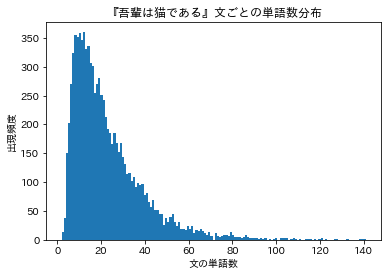

In [2]:
# -*- coding: utf-8 -*-
# リスト 4-3  文ごとに単語に分解し、出現頻度を数える
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt
from aozora import Aozora
import MeCab
 
aozora = Aozora("wagahaiwa_nekodearu.txt")
 
# 入力テキストを文に分解する。単純に'。'で分割する
string = '\n'.join(aozora.read())
string = re.sub('　', '', string)
string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')      # 空行を除く
 
# 文ごとに形態素解析して、文当たりの語の数を数える
m = MeCab.Tagger("-Ochasen")                # MeCabで単語に分割する
wordcountlist = []
for sentense in string:
    mecablist = []
    wlist = m.parse(sentense).splitlines()  # 結果を単語情報リストのリストに整形する
    for u in wlist:
        xlist = []
        for v in u.split():
           xlist.append(v)
        mecablist.append(xlist)
    # 得られた単語情報リストのリストから、単語の部分だけを取り出したリストを作る
    wordbodylist = []
    for u in mecablist:
        wordbodylist.append(u[0])
    # 単語数のリストを作る
    wordcountlist.append(len(wordbodylist))
 
cnt = Counter(wordcountlist)
# 結果をカウント数の降順にソート
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])
u = np.array(wordcountlist)
nstring = u[ np.where(u < 150) ]
plt.hist(nstring, bins=nstring.max())
plt.title('『吾輩は猫である』文ごとの単語数分布')
plt.xlabel('文の単語数')
plt.ylabel('出現頻度')
plt.show()

文の単語数≒文の長さや冗長さ？